# Train the model
Use Google Colab and follow the instruction there to train your model:
- Colab URL: https://colab.research.google.com/drive/191t7vUG9zT2iLlFzI-NBUsqiiupO4eIk?usp=sharing

# Download the weights
Once the model is trained, download the weights on your system. Make sure your system has access to the internet:
- Navigate to your Google Drive and copy the link to the weight file. Ensure the file is shared publicly or with anyone who has the link.
- Run the code below to download the weights.

In [3]:
# Define the output file name
model_path = "test.pt"  # Replace with the desired output file name, make sure the format is .pt

In [13]:
import requests
import re

# Google Drive URL
url = "https://drive.google.com/file/d/1ooZSLpplacxXFtDhRalBziKXGtRNG4Fu/view?usp=drive_link"

# Extract file ID from URL
file_id = re.search(r'/d/([a-zA-Z0-9_-]+)', url).group(1)
print(f"Extracted file ID: {file_id}")

# Construct the direct download link
download_url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Function to download file using requests
def download_file(url, output_filename):
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(output_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192):
                if chunk:
                    f.write(chunk)

# Download the file
try:
    download_file(download_url, model_path)
    print(f"File downloaded to: {model_path}")
except requests.exceptions.RequestException as e:
    print(f"Error downloading the file: {str(e)}")

Extracted file ID: 1ooZSLpplacxXFtDhRalBziKXGtRNG4Fu
File downloaded to: test.ext


In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
from camera import Camera
import cv2
from ultralytics import YOLO

In [4]:
"""
Initialize model and export it to ncnn formt
"""
# Load a YOLOv8n PyTorch model
model = YOLO(model_path)

# Export the model to NCNN format
exported_model = model.export(format="ncnn")  # creates 'yolov8n_ncnn_model'

# Load the exported NCNN model
net = YOLO(exported_model, task="segment")

Ultralytics YOLOv8.2.51 🚀 Python-3.11.2 torch-2.3.1 CPU (Cortex-A76)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs

PyTorch: starting from 'test.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 37, 8400), (1, 32, 160, 160)) (6.5 MB)

TorchScript: starting export with torch 2.3.1...
TorchScript: export success ✅ 8.3s, saved as 'test.torchscript' (12.9 MB)

NCNN: starting export with NCNN 1.0.20240410...
NCNN: running '/usr/local/lib/python3.11/dist-packages/ultralytics/pnnx test.torchscript ncnnparam=test_ncnn_model/model.ncnn.param ncnnbin=test_ncnn_model/model.ncnn.bin ncnnpy=test_ncnn_model/model_ncnn.py pnnxparam=test_ncnn_model/model.pnnx.param pnnxbin=test_ncnn_model/model.pnnx.bin pnnxpy=test_ncnn_model/model_pnnx.py pnnxonnx=test_ncnn_model/model.pnnx.onnx fp16=0 device=cpu inputshape="[1, 3, 640, 640]"'


pnnxparam = test_ncnn_model/model.pnnx.param
pnnxbin = test_ncnn_model/model.pnnx.bin
pnnxpy = test_ncnn_model/model_pnnx.py
pnnxonnx = test_ncnn_model/model.pnnx.onnx
ncnnparam = test_ncnn_model/model.ncnn.param
ncnnbin = test_ncnn_model/model.ncnn.bin
ncnnpy = test_ncnn_model/model_ncnn.py
fp16 = 0
optlevel = 2
device = cpu
inputshape = [1,3,640,640]f32
inputshape2 = 
customop = 
moduleop = 
############# pass_level0
inline module = ultralytics.nn.modules.block.Bottleneck
inline module = ultralytics.nn.modules.block.C2f
inline module = ultralytics.nn.modules.block.DFL
inline module = ultralytics.nn.modules.block.Proto
inline module = ultralytics.nn.modules.block.SPPF
inline module = ultralytics.nn.modules.conv.Concat
inline module = ultralytics.nn.modules.conv.Conv
inline module = ultralytics.nn.modules.head.Segment
inline module = ultralytics.nn.modules.block.Bottleneck
inline module = ultralytics.nn.modules.block.C2f
inline module = ultralytics.nn.modules.block.DFL
inline module = 

NCNN: export success ✅ 3.7s, saved as 'test_ncnn_model' (12.6 MB)

Export complete (14.7s)
Results saved to /home/dorna/Downloads/dorna_vision/example
Predict:         yolo predict task=segment model=test_ncnn_model imgsz=640  
Validate:        yolo val task=segment model=test_ncnn_model imgsz=640 data=/content/cardamom/data.yaml  
Visualize:       https://netron.app


In [5]:
"""
Initialize camera
"""
# camera
camera = Camera()
print("Camera connected: ", camera.connect())

Camera connected:  True



0: 640x640 14 cardamoms, 221.0ms
Speed: 5.5ms preprocess, 221.0ms inference, 56.7ms postprocess per image at shape (1, 3, 640, 640)


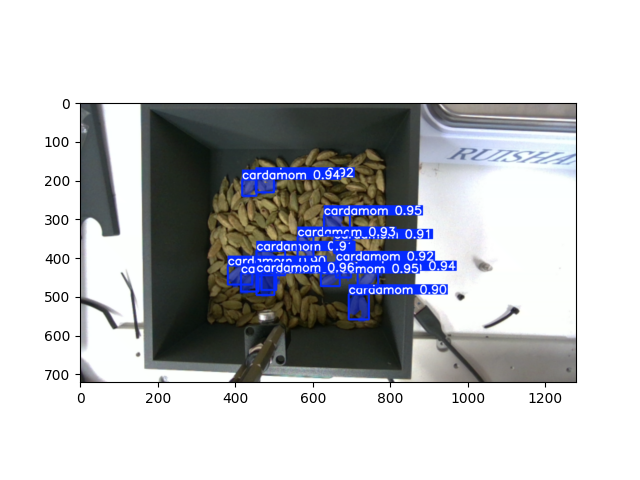

In [8]:
"""
detection loop
"""
# camera data
_, _, _, _, _, color_img, _, _, _= camera.get_all()

# detection
results = net(color_img, half=True, conf=0.90)

# Visualize the results on the frame
annotated_frame = results[0].plot()

# Display the image
fig, ax = plt.subplots(frameon=False)
ax.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
"""
Always close the camera, once your application is over
"""
# terminate the session
camera.close()

True